<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.


## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [68]:
# calculo e[-1]

import pandas as pd
import numpy as np

def funcion (x, N):

  cont = 0

  for j in range(0, N):

    sum = (-1)**j *((x**j) / np.math.factorial(j))

    cont += sum

  return cont

In [69]:
funcion(3,10)

0.03705357142857146

In [70]:
import numpy as np

# Función que calcula e^-x de forma de sumatoria

def fun_exp(x):
  resultado = 0
  termino = 1
  n = 0

  # Calcula e^-x hasta que el término actual sea suficientemente pequeño (no se restringe hasta un n manualmente)
  while abs(termino) > 1e-10:
    resultado += termino
    n += 1
    termino = (-1)**n * (x**n) / np.math.factorial(n)

  return resultado

In [71]:
fun_exp(3)

0.04978706834318028

In [72]:
#Creamo la función de la serie alternante e^-x
import math

def serie_Alter(x,n):

  exponencial = 0

  for i in range(n):

    exponencial += ((-1)**i)*(x**i/math.factorial(i))
    
  return exponencial

#Comparamos con la función de numpy

x=10

n = 100

eSerie = serie_Alter(x,n)
eNumpy = np.exp(-x)

print('La serie nos da:', eSerie,' y la función de numpy da:',eNumpy)

La serie nos da: 4.5399929433607724e-05  y la función de numpy da: 4.5399929762484854e-05


In [73]:
import numpy as np

def exp(x):

    resultado = 0
    termino = 1
    i = 0
    
    while np.abs(termino) > 1e-7*resultado or i < 2:
        resultado += termino
        i += 1
        termino *= x/i

    resultado = 1/resultado

    return resultado

In [74]:
print(exp(100))
print(np.exp(-100))
print(serie_Alter(100,50))

3.7200767661290933e-44
3.720075976020836e-44
-1.1008868652238055e+35


In [75]:
#ERROR

error = eNumpy - eSerie

print('El error entre los dos resultados es de:',error)

El error entre los dos resultados es de: 3.2887713006472113e-13


In [76]:
#Comparemos con valores de x menores o iguales que uno

print(serie_Alter(-10,1000))
print(np.exp(-10))

22026.46579480671
4.5399929762484854e-05


In [77]:
# Determinamos cuando la serie empieza a perder exactitud y cuando no converge

precision_perdida = None
no_converge = None

for x in np.linspace(1, 100, 10000):

    resultado = exp(x)

    if np.abs(resultado - np.exp(x)) > 1e-7*np.exp(x) and precision_perdida is None:
        precision_perdida = x
        
    if np.isnan(resultado) and no_converge is None:
        no_converge = x
        break

if precision_perdida is not None:
    print("La serie comienza a perder precisión en x =", precision_perdida)
else:
    print("La serie no pierde precisión en el rango de valores de x considerado.")
if no_converge is not None:
    print("La serie deja de converger en x =", no_converge)
else:
    print("La serie converge para todos los valores de x considerados.")

La serie comienza a perder precisión en x = 1.0
La serie converge para todos los valores de x considerados.


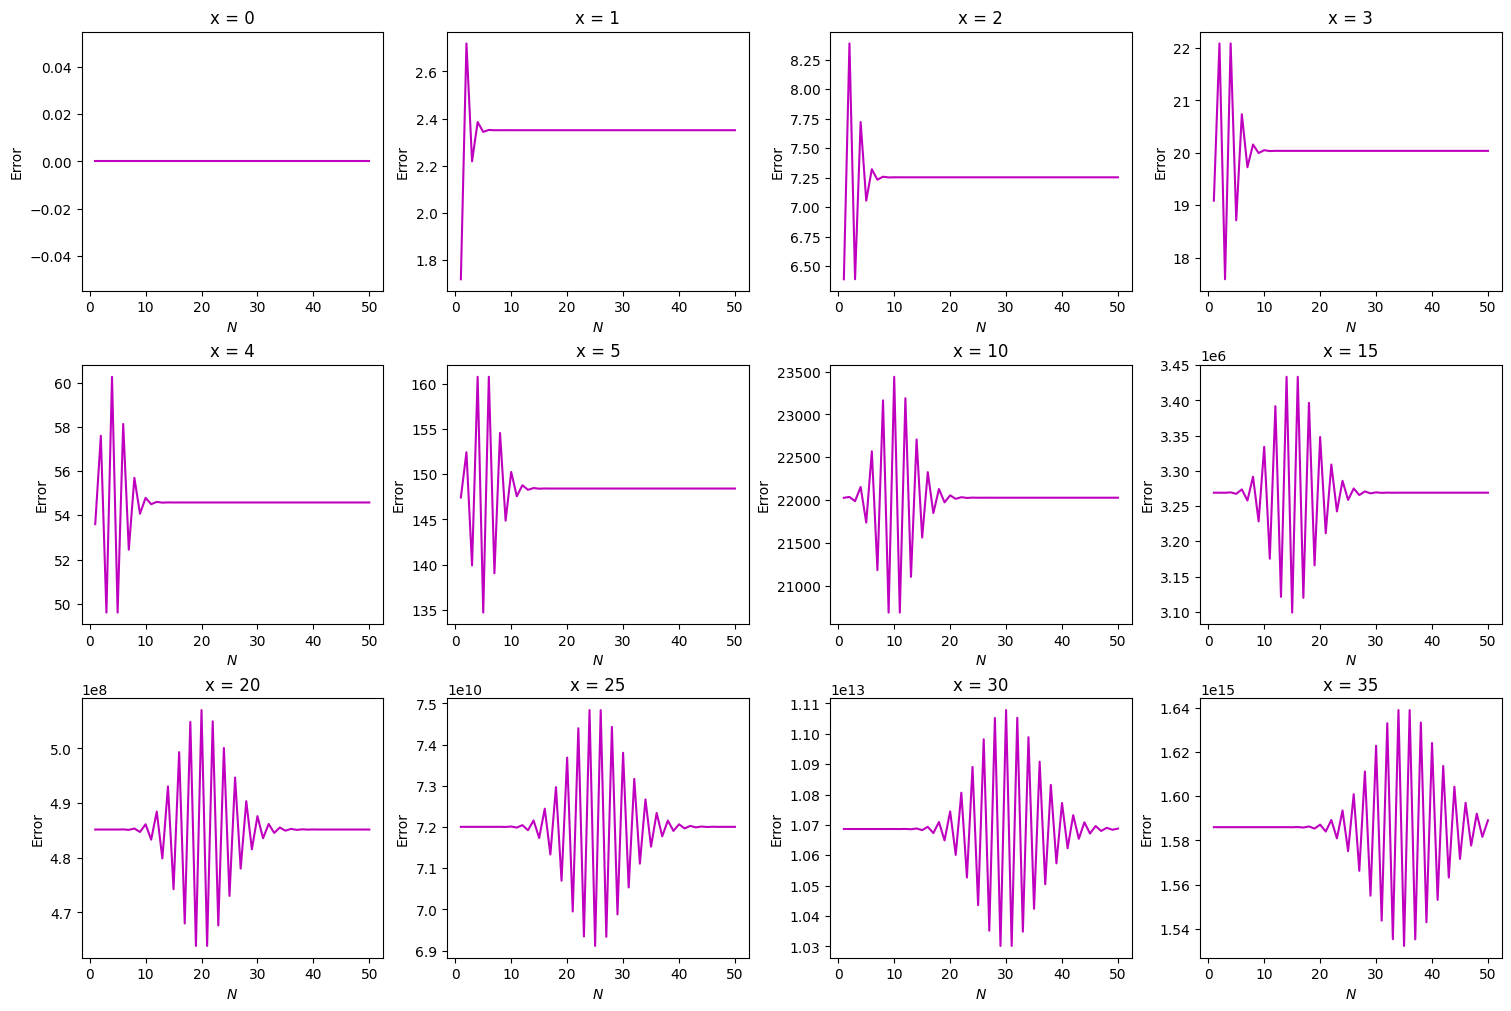

In [78]:
import matplotlib.pyplot as plt
import numpy as np

x_values = [0, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35]

# Rango de N valores para graficar
N = np.arange(1, 51)

# Define los valores reales de exp(x) para calcular el error
true_exp = np.exp(x_values)

# Gráfico
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), constrained_layout=True)
axs = axs.ravel()

# Itera cada valor de x y grafica el error versus N (rango)
for i, x in enumerate(x_values):
    # Valor estimado de exp(x) para cada N (se usa la definición de fun_exp)
    estimated_exp = [serie_Alter(x, n) for n in N]
    # Error absoluto para cada N
    abs_error = np.abs(estimated_exp - true_exp[i])

    axs[i].plot(N, abs_error, color = 'm')
    axs[i].set_title("x = {}".format(x))
    axs[i].set_xlabel("$N$")
    axs[i].set_ylabel("Error")

plt.show()

In [79]:
#Creemos la función de la serie alternante e^-x.
def serie_Euler(x,n):
  if (n==0):
    return 1
  exponencial = 0
  for i in range(n):
    exponencial += (x**i/math.factorial(i))
  return 1/exponencial

#Comparemos con la función de numpy
x=10
n = 1000

expSerie = serie_Euler(x,n)
expAlternante = serie_Alter(x,n)

print('La serie nos da:', expSerie,'y la la serie alternante:',expAlternante)

La serie nos da: 4.539992976248486e-05 y la la serie alternante: 4.5399929433607724e-05


In [80]:
#Veamos el error o diferencia entre esta última serie y la serie alternante.

dife = float(expSerie) - float(expAlternante)
dife

3.288771368409847e-13

In [81]:
import numpy as np

# Cálculo de una serie s

def s_1(n):
  serie1 = 0
  for i in range(1, 2*n+1):
    suma = (-1)**i * (i/(i+1))
    serie1 += suma

  return serie1  

s_1(1000)

0.3066030068151212

In [82]:
# Calculo de la misma serie sumando números pares e impares

def s_2(n2):
  serie21 = 0
  serie22 = 0
  for i in range(1, n2):
    sum1 = (2*i - 1) / (2*i)
    serie21 += sum1
    sum2 = 2*i / (2*i + 1)
    serie22 += sum2
  return (-1)*serie21 + serie22

s_2(1000)

0.3066027569383323

In [83]:
#Convergencia de la serie para los tres casos

def conver_s_1(n):
    # Aplicar el criterio de Leibniz
    for i in range(1, n):
        a_i = (-1)**i * (i/(i+1))
        a_i_1 = (-1)**(i+1) * ((i+1)/(i+2))
        if abs(a_i) <= abs(a_i_1):
            return True
        elif a_i == 0:
            return True
    return False

conver_s_1(1000)

True

In [84]:
def conver_s_2(n2):
    # Aplicar el criterio de Leibniz
    for i in range(1, n2):
        a_i = (-1)**i * ((2*i - 1)/(2*i))
        a_i_1 = (-1)**(i+1) * ((2*i + 1)/(2*i + 2))
        if abs(a_i) <= abs(a_i_1):
            return True
        elif a_i == 0:
            return True
    return False

conver_s_2(1000)

True

In [85]:
# Combinando las series de una forma analítica
 
def s_3(n3):
  serie3 = 0
  for i in range(1, n3):
    suma3 = 1 / (2*i*(2*i + 1))
    serie3 += suma3
  return serie3

s_3(1000)

0.3066027569400623

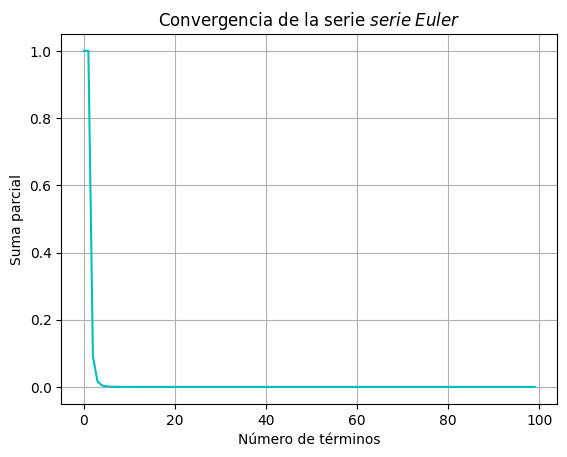

In [86]:
#Series de forma analitica

x = 10
n = np.arange(100)
numerosSerie = np.zeros(100)

for i in n:

  numerosSerie[i] = serie_Euler(10,i)

#Graficamos

import matplotlib.pyplot as plt

plt.plot(n,numerosSerie, color='c')
plt.xlabel('Número de términos')
plt.ylabel('Suma parcial')
plt.title('Convergencia de la serie $serie _ Euler$')
plt.grid()

In [87]:
def plot_error(s, ns, label):
  
  errors = []

  for n in ns:
    
    s_exact = s(n)
  
    error = np.abs((s_exact - s_3(n)) / s_exact)
  
    errors.append(error)

  plt.loglog(ns, errors, color = 'y')
  plt.xlabel('$Log N$')
  plt.ylabel('$Log E$')
  plt.title(f'Error relativo para {label}')
  plt.show()

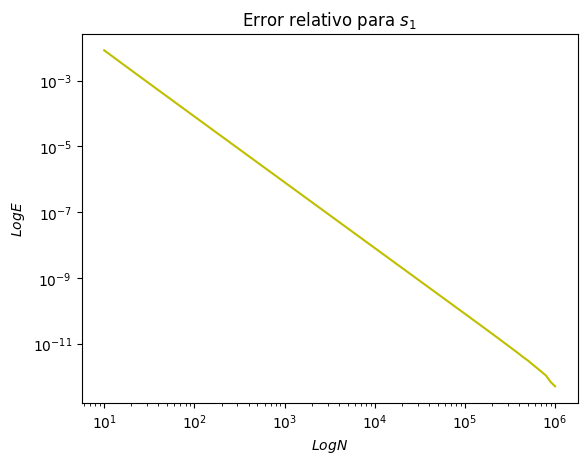

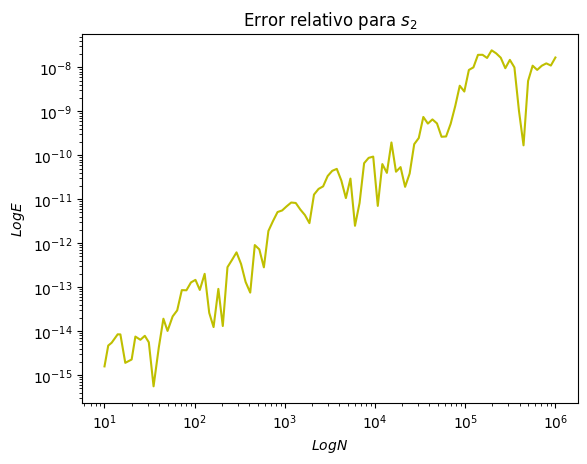

In [88]:
# Graficar error relativo para s_1
plot_error(s_1, np.logspace(1, 6, num=100).astype(int), '$s_1$')

# Graficar error relativo para s_2
plot_error(s_2, np.logspace(1, 6, num=100).astype(int), '$s_2$')

# **Analisis**

Las opereciones que realiza el procesador o programa tienen un grado de precision dado por la cantidad de terminos que se este operando al tiempo por lo que existe mas probabilidad de error gracias a que si hay muchos terminos el procesador debe aproximar algunos de estos y esto toma mas tiempo y ademas como es tanta cantidad de numeros tendra mas error que una expresion que tenga poca cantidad.

Esto se relaciona con las series del calculo del error debdio a  que estas series son útiles para aproximar el valor de una operacion o de un número, pero su convergencia puede ser lenta y requerir un gran número de términos para lograr una precisión.